In [1]:
import numpy as np
import random
import networkx as nx
import matplotlib.pyplot as plt
from scipy.stats import kendalltau
from scipy.stats import spearmanr
from scipy import stats
from sklearn.decomposition import PCA
import seaborn as sns
import random
import sys
import copy
from igraph import *
import time
import numpy as np
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [56]:
g = Graph.Read_Ncol("soc-Epinions1.txt", directed = False)
with open('redes e centralidades/centralidades-soc-Epinions1-picke.txt', 'rb') as f:
    centralidade_list = pickle.load(f)
    
# g = Graph.Read_Ncol("CA-GrQc.txt", directed = False)
# with open('redes e centralidades/centralidades-CA-GrQc-picke.txt', 'rb') as f:
#     centralidade_list = pickle.load(f)

In [57]:
for i in centralidade_list:
    
    print sorted(i,reverse=True)[:10],'\n'

[0.04057829673950289, 0.029112522733862254, 0.026344922111811067, 0.02585729724030681, 0.022298953583383855, 0.022259416431640266, 0.019966261630512138, 0.018266164105537837, 0.01730409341311052, 0.017014154300324207] 

[0.016644931968783784, 0.013933385852905496, 0.013674239370466324, 0.013112800117706491, 0.012675819578217184, 0.012570425428405401, 0.011636849291163183, 0.010680049991203231, 0.007825088325682572, 0.007803634437215065] 

[0.004657194750781488, 0.0028806802935228354, 0.0021545609735657357, 0.002121522479957848, 0.002058821821771401, 0.002035177200610162, 0.0020036756423157677, 0.0015923816594210368, 0.0015263284950160763, 0.0014781820321578413] 

[0.2885720545129263, 0.2687877488457861, 0.2665230667673981, 0.2654485807095569, 0.2648962044822316, 0.26485278161282527, 0.26471926203043805, 0.2608919480530762, 0.26043744655335876, 0.2590450506987298] 

[0.13455432897061093, 0.12647049843670377, 0.11655919358441771, 0.11107223372669849, 0.1105597363157683, 0.105499283595417

In [58]:
len(centralidade_list)

7

In [59]:
X = np.array(centralidade_list)
X = X.transpose()
X[5] = stats.zscore(X[5])

# problemas de escala

# X = stats.zscore(X)
X.shape

(75879, 7)

In [60]:
varience_values = []

pca = PCA(n_components=1,svd_solver='full')
teste = pca.fit_transform(X)
explained_varience = pca.explained_variance_ratio_.sum()
print(float(pca.explained_variance_ratio_.sum()*100))
print(pca.explained_variance_ratio_,len(pca.explained_variance_ratio_))
print(pca.singular_values_,len(pca.singular_values_))  

99.9999999999
(array([1.]), 1)
(array([1720687.13984513]), 1)


In [61]:
lista_teste = teste.tolist()
len(lista_teste)
#  a partir daqui é so pegar os index igual no que ja tem
pca_values = []
for sublist in lista_teste:
    for item in sublist:
        pca_values.append(item)
        
len(pca_values)
# print(flat_list[:50])

75879

In [62]:
a = np.array(pca_values)
a = a.reshape(len(a),1)
X = np.append(X,a,axis=1)
X.shape

(75879, 8)

In [63]:
labels_medidas = ['0_grau','1_betweennes','2_pagerank','3_closeness','4_eigenvector_centrality','5_harmonic_centrality','6_load_centrality','7_PCA_all(0-6)']
labels_medidas

['0_grau',
 '1_betweennes',
 '2_pagerank',
 '3_closeness',
 '4_eigenvector_centrality',
 '5_harmonic_centrality',
 '6_load_centrality',
 '7_PCA_all(0-6)']

In [64]:
#  A partir daqui analise de correlacao entre as medidas

In [65]:
def calcula_PCA(matrix,col1,col2): # pca entre duas colunas
    vindex = [i for i in range(g.vcount())]
    
    Y = np.array([matrix[:,col1],matrix[:,col2]])
    Y = Y.transpose()
#     print (Y.shape)
#     print (Y,type(Y),type(Y[0]),len(Y[0]))
    
    pca = PCA(n_components=1,svd_solver='full')
    teste = pca.fit_transform(Y)
    explained_varience = pca.explained_variance_ratio_.sum()
    print(float(pca.explained_variance_ratio_.sum()*100))
    lista_teste = teste.tolist()
    flat_list = []
    for sublist in lista_teste:
        for item in sublist:
            flat_list.append(item)
    aflat, seeds_PCA = (list(x) for x in zip(*sorted(zip(flat_list, vindex), reverse=True)))
    return (seeds_PCA,np.array(flat_list))

In [66]:
def calcKendall(matrix):
    matrix_kendall = []
    for i in range(matrix.shape[1]):
        kend = []
        for j in range(matrix.shape[1]):
            tau, p_value = kendalltau(matrix[:,i],matrix[:,j])
            kend.append(tau)
        matrix_kendall.append(kend)
    matrix_kendall = np.array(matrix_kendall)
    return(matrix_kendall)

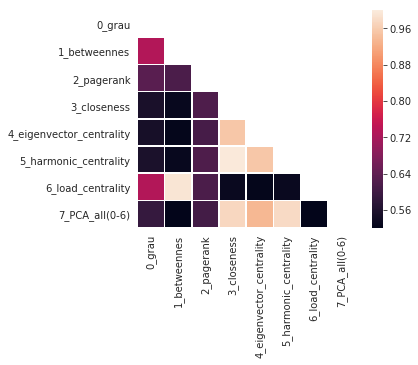

In [67]:
corr = calcKendall(X)
# sns.heatmap(,xticklabels=labels,yticklabels=labels,linewidths=.5)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask,square=True,xticklabels=labels_medidas,yticklabels=labels_medidas,linewidths=.5)

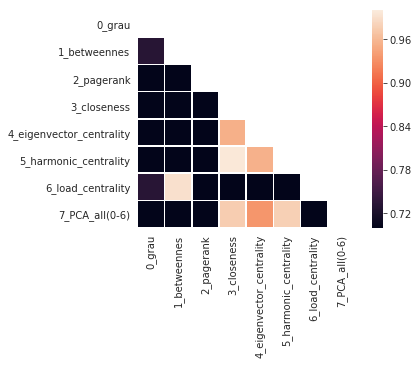

In [68]:
corr = calcKendall(X)
# sns.heatmap(,xticklabels=labels,yticklabels=labels,linewidths=.5)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, vmin=.7,mask=mask,square=True,xticklabels=labels_medidas,yticklabels=labels_medidas,linewidths=.5)

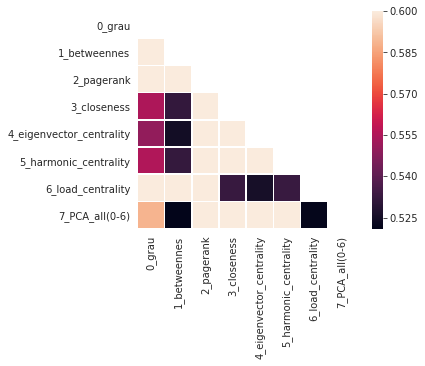

In [69]:
corr = calcKendall(X)
# sns.heatmap(,xticklabels=labels,yticklabels=labels,linewidths=.5)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, vmax = .6,mask=mask,square=True,xticklabels=labels_medidas,yticklabels=labels_medidas,linewidths=.5)

In [70]:
matrix_teste = X

In [71]:
# Alta correlacao CA-GRQC

# c_1_6 = calcula_PCA(matrix_teste,1,6)
# c_3_4 = calcula_PCA(matrix_teste,3,4)
# c_3_5 = calcula_PCA(matrix_teste,3,5)
# c_4_5 = calcula_PCA(matrix_teste,4,5)

# Alta correlacao SOC-Epinions

c_1_6 = calcula_PCA(matrix_teste,1,6)
c_3_4 = calcula_PCA(matrix_teste,3,4)
c_3_5 = calcula_PCA(matrix_teste,3,5)
c_4_5 = calcula_PCA(matrix_teste,4,5)

99.9975067587
99.7699334952
100.0
100.0


In [72]:
# Baixa correlacao CA-GRQC
# c_2_3 = calcula_PCA(matrix_teste,2,3)
# c_2_4 = calcula_PCA(matrix_teste,2,4)
# c_2_5 = calcula_PCA(matrix_teste,2,5)

# Baixa correlacao SOC-Epinions
c_1_3 = calcula_PCA(matrix_teste,1,3)
c_1_4 = calcula_PCA(matrix_teste,1,4)
c_1_5 = calcula_PCA(matrix_teste,1,5)

99.9646358969
89.8631003511
100.0


In [73]:
#  adicionando na matrix temporaria CA-GRQC
# matrix_teste = np.hstack((matrix_teste, np.array([c_1_6[1]]).transpose()))
# matrix_teste = np.hstack((matrix_teste, np.array([c_3_4[1]]).transpose()))
# matrix_teste = np.hstack((matrix_teste, np.array([c_3_5[1]]).transpose()))
# matrix_teste = np.hstack((matrix_teste, np.array([c_4_5[1]]).transpose()))
# matrix_teste = np.hstack((matrix_teste, np.array([c_2_3[1]]).transpose()))
# matrix_teste = np.hstack((matrix_teste, np.array([c_2_4[1]]).transpose()))
# matrix_teste = np.hstack((matrix_teste, np.array([c_2_5[1]]).transpose()))
# matrix_teste.shape

#  adicionando na matrix temporaria SOC-Epinions

matrix_teste = np.hstack((matrix_teste, np.array([c_1_6[1]]).transpose()))
matrix_teste = np.hstack((matrix_teste, np.array([c_3_4[1]]).transpose()))
matrix_teste = np.hstack((matrix_teste, np.array([c_3_5[1]]).transpose()))
matrix_teste = np.hstack((matrix_teste, np.array([c_4_5[1]]).transpose()))
matrix_teste = np.hstack((matrix_teste, np.array([c_1_3[1]]).transpose()))
matrix_teste = np.hstack((matrix_teste, np.array([c_1_4[1]]).transpose()))
matrix_teste = np.hstack((matrix_teste, np.array([c_1_5[1]]).transpose()))
matrix_teste.shape

(75879, 15)

In [62]:
# olhando correlacao das novas medidas da matrix teste

In [74]:
# Ca-GRQC
# labels = ['0_grau','1_betweennes','2_pagerank','3_closeness','4_eigenvector_centrality','5_harmonic_centrality','6_load_centrality','7_PCA_all','16','34','35','45','23','24','25']
# Soc-Epinions
labels = ['0_grau','1_betweennes','2_pagerank','3_closeness','4_eigenvector_centrality','5_harmonic_centrality','6_load_centrality','7_PCA_all','16','34','35','45','13','14','15']

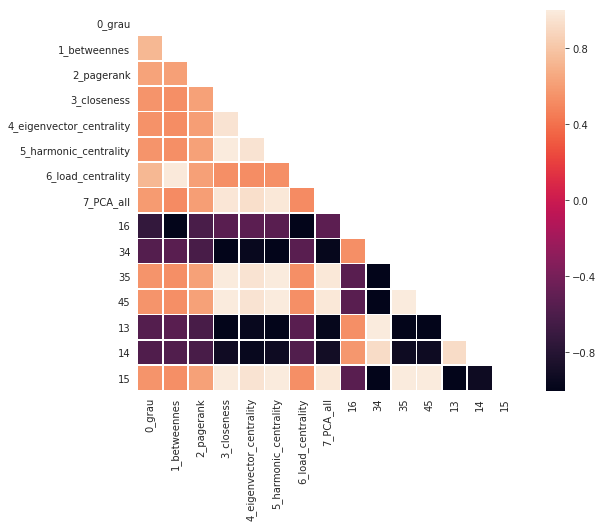

In [75]:
# 
a = plt.figure(figsize=(10,7))
corr = calcKendall(matrix_teste)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask,square=True,xticklabels=labels,yticklabels=labels,linewidths=.5)

In [76]:
import pandas as pd


In [77]:
vindex = [i for i in range(g.vcount())]

my_list = X
### my_list[0] = grau
### my_list[1] = betweenness
### my_list[2] = pagerank
### my_list[3] = closeness
### my_list[4] = eigenvector_centrality
### my_list[5] = harmonic_centrality
### my_list[6] = load_centrality 
### my_list[7] = PCA_all
### ...etc
aflat, seeds_grau = (list(x) for x in zip(*sorted(zip(my_list[:,0], vindex), reverse=True)))
aflat, seeds_betweennes = (list(x) for x in zip(*sorted(zip(my_list[:,1], vindex), reverse=True)))
aflat, seeds_pagerank = (list(x) for x in zip(*sorted(zip(my_list[:,2], vindex), reverse=True)))
aflat, seeds_closeness = (list(x) for x in zip(*sorted(zip(my_list[:,3], vindex), reverse=True)))
aflat, seeds_eigenvector_centrality = (list(x) for x in zip(*sorted(zip(my_list[:,4], vindex), reverse=True)))
aflat, seeds_harmonic_centrality = (list(x) for x in zip(*sorted(zip(my_list[:,5], vindex), reverse=True)))
aflat, seeds_load_centrality = (list(x) for x in zip(*sorted(zip(my_list[:,6], vindex), reverse=True)))
aflat, seeds_PCA = (list(x) for x in zip(*sorted(zip(pca_values, vindex), reverse=True)))


In [81]:
# ,'16','34','35','45','13','14','15']
d = {'0_grau' : seeds_grau[:100],'1_betweennes':seeds_betweennes[:100],
     '2_pagerank' :seeds_pagerank[:100],'3_closeness':seeds_closeness[:100],
     '4_eigenvector_centrality':seeds_eigenvector_centrality[:100],'5_harmonic_centrality':seeds_harmonic_centrality[:100],
     '6_load_centrality':seeds_load_centrality[:100],'7_PCA_all':seeds_PCA[:100],
     'm_1_6':c_1_6[0][:100],
     'm_34':c_3_4[0][:100],'m_35':c_3_5[0][:100],
     'm_45':c_4_5[0][:100],
     'm_13':c_1_3[0][:100],
     'm_14':c_1_4[0][:100],'m_15':c_1_5[0][:100]}

In [82]:
df = pd.DataFrame(data=d)
df.head()

,0_grau,1_betweennes,2_pagerank,3_closeness,4_eigenvector_centrality,5_harmonic_centrality,6_load_centrality,7_PCA_all,m_13,m_14,m_15,m_1_6,m_34,m_35,m_45
0,14,40,14,14,14,14,40,14,5,5,14,5,5,14,14
1,363,1677,185,185,150,185,1677,185,75878,75878,185,75878,75878,185,185
2,1867,1867,529,132,157,530,1867,530,75877,75877,530,75877,75877,530,530
3,1677,697,230,230,185,132,697,132,75876,75876,132,75876,75876,132,132
4,530,363,114,530,30,230,363,230,75875,75875,230,75875,75875,230,230


In [83]:
s = [seeds_grau[:50],seeds_betweennes[:50],
    seeds_pagerank[:50],seeds_closeness[:50],
    seeds_eigenvector_centrality[:50],seeds_harmonic_centrality[:50],
    seeds_load_centrality[:50],seeds_PCA[:50],c_1_6[0][:50],
    c_3_4[0][:50],c_3_5[0][:50],c_4_5[0][:50],
     c_1_3[0][:50],c_1_4[0][:50],
     c_1_5[0][:50]]
with open('sementes-SOC-Epinions.txt', 'wb') as f:
    pickle.dump(s, f)